## Principal Component Analysis

Now that we have learned the basics of the Python language and studied the functionality of several higher-level modules, we are ready to experiment with some industry-standard tools for machine learning. We are going to start with the family of methods that are collectively referred to as *unsupervised* machine learning. 

Unsupervised machine learning methods are all about revealing patterns hidden in our data. For example, there may be hidden patterns in our customer survey data that can tell us what our customers really care about. In this lesson, we will learn how to use the tool **Principal Component Analysis (PCA)** to reveal these patterns.

### An Example Dataset

Before we learn how to use PCA, we need some data to work with. Our dataset of choice will be a csv file containing customers' answers to a real-life customer satisfaction survey performed by the San Francisco International Airport ([source](https://www.flysfo.com/media/customer-survey-data)). The survey answers are on a scale of 1 (very bad) to 5 (very good.) While we are using an airport-specific survey in this lesson, you could apply PCA similarly to any survey dataset relevant in your industry. Let's load this data and take a look at it:

In [1]:
import pandas as pd
survey_df = pd.read_csv('data/pca_survey.csv')
survey_df.head()

,Artwork and exhibitions,Restaurants,Retail shops and concessions,Signs and directions inside SFO,Escalators/Elevators/Moving walkways,Information on screens/monitors,Information booths (lower level - near baggage claim),Information booths (upper level - departure area),Accessing and using free WiFi at SFO,Signs and directions on SFO airport roadways,Airport parking facilities,AirTrain,Long term parking lot shuttle (bus ride),Airport Rental Car Center,SFO Airport as a whole
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


You can see that each row of the table above corresponds to a single customer, and each column contains that customer's answer to a particular survey question.

There are fifteen questions in the survey above. This is a large number, and many customers are likely unwilling to fill out the entire survey. The central question that the PCA method will answer for us is this: how many survey questions do we *actually* need to ask in order to learn everything that we need to know about our customers? Notice that some of the questions in the list appear to be redundant. For example, "Information booths (lower level - near baggage claim)" and  "Information booths (upper level - departure area)" could probably be replaced with just a single "Information booths" question, since most of the time customers give the same answer to both questions on this topic. PCA will identify patterns in our data that allow us to see which questions can be combined together, and thus it will tell us the total number of meaningful questions that we should ask. 

### Data Normalization

Before we use the PCA method, we need to preprocess our data. In order to get the best results, it is standard practice to shift our data so each variable (survey question) has zero mean and unit variance. If those statistics terms are unfamiliar to you, do not worry, just think of this step as "cleaning up our data." Curious readers can learn about the need for this preprocessing step [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). The code that performs this process is shown below:

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
preprocessed_data = scaler.fit_transform(survey_df)

Notice that we are importing functionality from the `sklearn` module - this new module contains many useful machine learning methods and we will use it extensively in this course. 
The variable `preprocessed_data` now contains a "cleaned up" version of our original survey question data from the table above.

### Running PCA

Now that we have pre-processed our data, we can run PCA using the code below:

In [3]:
from sklearn.decomposition import PCA

pca_model = PCA()
pca_model.fit(preprocessed_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Believe it our not, that's actually all the code that we need. Our `pca_model` object now contains all of the results produced by the PCA algorithm. We can take a look at the data inside this object by listing its attributes in the same way that we learned in previous lessons. Click to the right of the `.` on the line below and hit `Tab` to see the attributes of this object:

In [5]:
pca_model.transform

<bound method _BasePCA.transform of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

### Analyzing the Results: How Many Questions to Ask?

We can now answer the central question that we posed above: how many survey questions do we actually need to ask? The answer is contained within our `pca_model` object, in the attribute `explained_variance_ratio_`:

In [6]:
pca_model.explained_variance_ratio_

array([0.66494144, 0.0887632 , 0.0568264 , 0.04113386, 0.02568522,
       0.0219077 , 0.01849753, 0.0164896 , 0.01568296, 0.01171462,
       0.01104971, 0.0095403 , 0.00813736, 0.00736492, 0.00226517])

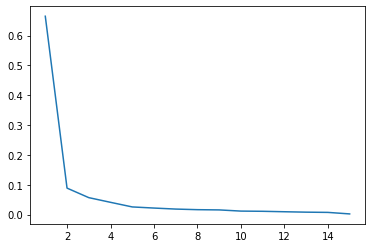

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_)

This array tells us that by asking one survey question, we recover ~66% of the information contained in our original survey dataset. By asking one additional question, we recover ~9% more information. We can see that each additional question that we ask gives us slightly less "return on investment" - eventually, each additional question that we add gives us less than 1% additional information about our customers. 

So, knowing this information, how many questions should we ask? There is no hard-and-fast rule for making this determination; in this case, we will aim to ask enough questions to recover 95% of the information in the original survey. If we add up the amount of information recovered by each question, we can see that a survey with only **nine** questions will fulfill this requirement:

In [11]:
sum(pca_model.explained_variance_ratio_[0:9])

0.9499279161131959

### Additional Analysis: How to Write New Questions?

We now know how many survey questions we need to ask in order to get the most information from our customers, without inconveniencing them by filling out a survey that is unnecessarily long. But while we know the *number* of questions that we need, we do not know specifically *what* these questions should be. That information is contained in the `components_` attribute of our `pca_model`. Let's take a look at the data stored inside that attribute:

In [12]:
pca_model.components_

array([[-2.11634134e-01, -2.19265604e-01, -2.45889379e-01,
        -2.54916954e-01, -2.68599445e-01, -2.68534939e-01,
        -2.72034144e-01, -2.72098927e-01, -2.39227608e-01,
        -2.61343483e-01, -2.68218856e-01, -2.73119224e-01,
        -2.67885418e-01, -2.65908487e-01, -2.73599381e-01],
       [-4.92998761e-01, -5.19172562e-01, -4.24297229e-01,
        -1.12700896e-01, -7.79796130e-04,  4.93233590e-02,
         6.25381337e-02,  4.38571975e-02,  1.16770697e-01,
         2.45635039e-01,  2.36686732e-01,  2.06896564e-01,
         2.11893419e-01,  2.45730704e-01, -9.12874703e-02],
       [ 1.14842456e-01,  1.99408233e-01,  1.22004210e-01,
        -2.19429991e-01, -2.59850276e-01, -2.77608701e-01,
        -3.47596847e-01, -3.63269680e-01, -3.18626232e-01,
         6.61883505e-02,  2.82866041e-01,  2.40467274e-01,
         3.58710831e-01,  3.15728077e-01,  1.20568955e-01],
       [ 6.85187063e-03, -1.95222337e-01, -6.45814323e-02,
         4.86845946e-01,  4.03642485e-01,  3.74304083

Looks like `pca_model.components_` is a numpy array, just like the ones that we have worked with before. What do the numbers in this array mean? Let's visualize them in a pandas DataFrame to make it more clear:

In [13]:
pd.DataFrame(
    pca_model.components_,
    columns=survey_df.columns
)

,Artwork and exhibitions,Restaurants,Retail shops and concessions,Signs and directions inside SFO,Escalators/Elevators/Moving walkways,Information on screens/monitors,Information booths (lower level - near baggage claim),Information booths (upper level - departure area),Accessing and using free WiFi at SFO,Signs and directions on SFO airport roadways,Airport parking facilities,AirTrain,Long term parking lot shuttle (bus ride),Airport Rental Car Center,SFO Airport as a whole
0,-0.211634,-0.219266,-0.245889,-0.254917,-0.268599,-0.268535,-0.272034,-0.272099,-0.239228,-0.261343,-0.268219,-0.273119,-0.267885,-0.265908,-0.273599
1,-0.492999,-0.519173,-0.424297,-0.112701,-0.000780,0.049323,0.062538,0.043857,0.116771,0.245635,0.236687,0.206897,0.211893,0.245731,-0.091287
2,0.114842,0.199408,0.122004,-0.219430,-0.259850,-0.277609,-0.347597,-0.363270,-0.318626,0.066188,0.282866,0.240467,0.358711,0.315728,0.120569
3,0.006852,-0.195222,-0.064581,0.486846,0.403642,0.374304,-0.335718,-0.342760,-0.418843,0.058890,0.033958,-0.044005,-0.057351,-0.003009,0.046314
4,-0.036908,0.038158,-0.038451,0.000440,-0.032110,-0.054617,-0.356162,-0.302291,0.584260,0.365050,0.158379,-0.217135,-0.103499,-0.293326,0.360352
5,0.751012,-0.337686,-0.453096,-0.117913,-0.080461,-0.046152,0.081765,0.105907,-0.114901,0.116345,0.052269,-0.018607,-0.061277,-0.042285,0.202197
6,0.227134,-0.094825,-0.139213,0.177116,0.069425,0.007720,-0.215313,-0.208140,0.525937,-0.545031,-0.193973,0.223594,0.198930,0.237401,-0.192056
7,0.168730,-0.088104,0.144003,0.462189,-0.261049,-0.282795,0.009952,-0.028873,0.065618,0.507832,-0.146183,0.026952,0.007468,0.042915,-0.542372
8,0.190399,0.107922,0.068158,-0.543060,0.358159,0.288748,-0.115039,-0.118521,0.073554,0.227859,0.065957,0.221831,-0.090249,-0.156082,-0.519819
9,-0.006791,0.118318,-0.086432,-0.178321,-0.243030,0.461993,-0.015311,-0.087947,0.004507,0.260053,-0.616047,-0.241794,0.227438,0.311046,0.110054


Let's now take some time to understand the table above in great detail. Each row is a *component* that the PCA method has calculated for us. These components are each a *combination* of our initial set of questions. The nature of each combination tells us how we should create the new questions for our improved shorter survey.

Recall that, according to our analysis above, we only need one question to recover over half of the information in our original survey. How should this question be phrased? Take a look at the first row of the components dataframe above and ignore any negative signs for the moment. We can see that this component is a (roughly) even combination of every single question in our original survey, because all of the numbers in this row are approximately equal. How could we construct a single survey question that yields such an "even combination?" We might simply ask "rate your overall experience on a scale of one to five." PCA is telling us that the answer to this single question should allow us to *predict* how a given customer would respond to most of the other questions. A quick glance at our data supports this hypothesis - most customers give either uniformly good or uniformly bad ratings across all categories. 

But what about the other components? We decided above that we want our new survey to contain nine questions, so we need to look at the first nine rows of the table above. Many of these rows are very difficult to interpret because they contain a wide range of unequal small numbers. How would we phrase a question corresponding to such a combination? The answer is very unclear - we will therefore need to transform our data further in order to find the answer. 

### Post-Processing: Varimax Rotation

Ideally, each row in our components table above would have a small number of columns with values larger than `0.5`, and the remaining columns in that row would all have much smaller values. This would indicate that the question corresponding to that component should be related specifically to the set of original questions with values in that row larger than `0.5`. Instead, we see that we have many values of approximately the same magnitude in each row, and none of the combinations of columns make much sense. However, our analysis is not complete. We need to use a method called **varimax rotation** to transform this initial set of components into a new set that will be easier for us to interpret.

Unfortunately, the varimax rotation method is not available in the standard math-related Python modules as of this writing, so we have provided an implementation below. The `varimax_rotation` function below contains some very complicated code, using libraries and mathematical techniques that we have not covered in this course. However, this is the beauty of using functions - you do not need to understand the implementation of a function in order to use it, you simply need to understand *how to call it.* In this case, this function can be called with a single argument: our array of components. 

In [14]:
# Arguments:
# c_trans: pca result array containing the components - dimension (n_components, n_variables)
# Returns:
# New components that have been rotated
def varimax_rotation(c_trans):
    c = c_trans.transpose()
    from numpy import diag, eye, dot, asarray
    from scipy.linalg import svd
    n_iter = 20
    gamma = 1.0
    tol = 1e-6
    p,k = c.shape
    R = eye(k)
    d=0
    for i in range(n_iter):
        d_old = d
        Lambda = dot(c, R)
        u,s,vh = svd(dot(c.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(c, R).transpose()

Remember, we only care about the first nine components for the reasons described above, so we'll apply varimax rotation to only those components:

In [15]:
important_components = pca_model.components_[0:9, :]
rotated_components = varimax_rotation(important_components)

Before we visualize the new components, we'll change a few pandas settings to make the final results easier to read - it is not necessary for you to understand this code, simply run it:

In [16]:
def format_two_dec(num):
    return "{:.2f}".format(num)
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", format_two_dec)

Let's take a look at our newly-rotated components with the significant values highlighted in red (don't worry about understanding the code that accomplishes the red highlighting, the important thing is the results):

In [17]:
def color_sig_red(val):
    if abs(val) > 0.5:
        color = 'red'
    else:
        color = 'black'
    return 'color: {}'.format(color)
df = pd.DataFrame(rotated_components, columns=survey_df.columns)
df.style.applymap(color_sig_red)

,Artwork and exhibitions,Restaurants,Retail shops and concessions,Signs and directions inside SFO,Escalators/Elevators/Moving walkways,Information on screens/monitors,Information booths (lower level - near baggage claim),Information booths (upper level - departure area),Accessing and using free WiFi at SFO,Signs and directions on SFO airport roadways,Airport parking facilities,AirTrain,Long term parking lot shuttle (bus ride),Airport Rental Car Center,SFO Airport as a whole
0,-0.0012,0.013,-0.011,-0.016,0.011,0.012,-0.022,0.012,0.00058,0.028,-0.28,-0.51,-0.54,-0.6,0.016
1,-1.9e-05,-0.72,-0.69,0.00022,-0.023,0.028,-0.0042,0.0018,0.0013,0.0016,0.0049,-0.019,-0.03,0.038,-0.0031
2,0.00071,0.015,-0.02,0.0076,0.032,-0.04,-0.71,-0.7,-0.0011,-0.01,0.069,-0.013,0.043,-0.048,-0.011
3,-0.0016,-0.0082,0.0087,0.015,0.71,0.68,-0.004,0.0058,-0.00033,-0.017,0.1,0.13,-0.074,-0.063,-0.0029
4,-0.005,0.025,-0.032,0.006,0.015,-0.018,-0.016,0.02,0.99,0.0054,-0.034,0.044,0.044,-0.058,0.0059
5,0.99,0.054,-0.06,0.0072,0.012,-0.02,-0.0098,0.0083,-0.0049,0.013,-0.055,0.077,-0.021,-0.019,0.013
6,-0.0094,0.059,-0.061,-0.027,0.024,0.01,-0.013,-0.0061,-0.0036,-0.94,-0.31,-0.0084,0.012,0.099,0.04
7,-0.0094,-0.081,0.082,-0.025,0.026,-0.028,0.012,-0.036,-0.0039,0.041,-0.28,0.17,-0.061,0.012,-0.93
8,-0.0066,0.11,-0.12,-0.96,-0.02,-0.016,0.00054,0.018,-0.0053,-0.032,0.18,0.11,-0.024,-0.12,-0.029


Our analysis is now complete. Let's walk through the final results. Focus on the values highlighted in red. In this example, the negative signs can be ignored. We can see that our improved, shorter survey should be contain a single question for each of these four areas:

1. Transportation to/from the Airport ("AirTrain", "Long term parking lot shuttle (bus ride)",	"Airport Rental Car Center")
2. Airport Amenities ("Restaurants", "Retail shops and concessions")
3. Information Booths ("Information booths (lower level - near baggage claim)", "Information booths (upper level - departure area)")
4. Travel Inside the Airport ("Escalators/Elevators/Moving walkways", "Information on screens/monitors")

The remaining questions (concerning artwork, wifi, etc) do not need to be changed, because we can see that the components corresponding to them contain only one red value. 

Notice that some of these results are non-intuitive. We might have expected that the question `"Signs and directions inside SFO"` would be a part of the `Travel Inside the Airport` component, but the math is telling us that this is not true. This is a useful lesson; the patterns that exist in our data are not always the ones that we expect - our customers may interpret our questions in non-intuitive ways.

### Beyond Surveys: Generalizing PCA

The mathematical underpinnings of PCA are rooted in fundamental linear algebra, and the interested reader can [investigate further](https://en.wikipedia.org/wiki/Principal_component_analysis) if desired. PCA is therefore a highly general technique - it can be used in any situation in which we have data consisting of  a large number of *samples* of a set of *features*. In the example above, our *samples* are each customer and our *features* are each question. The PCA method will then allow us to reduce the set of features in our dataset and retain only those that provide unique information. This is an example of a *data reduction* technique, and is very useful for converting our datasets into a more effective and economical form for machine learning. 

<span style="color:blue;font-weight:bold">Exercise</span>: Let's use PCA to analyze some stock market data. In this case, our *features* will be the percent change in the stock price of nine different companies, and the *samples* will be each day on which the stock price changes are recorded. First, let's look at the data we will be working with:

In [18]:
stock_df = pd.read_csv("data/stock_data.csv")
stock_df.head()

,Bank of America,Google,Amazon,United,American,Delta,Wells Fargo,Facebook,Citigroup
0,4.48,8.27,3.64,-6.83,-3.92,-0.16,-7.96,15.26,1.06
1,5.87,3.71,4.50,5.49,1.96,7.84,16.02,8.45,-2.35
2,16.87,-7.94,7.02,3.93,5.21,-0.42,19.32,-2.13,14.07
3,-12.31,8.90,-0.82,-20.41,-16.56,-22.40,-18.53,17.28,-19.85
4,-9.26,10.05,12.85,8.79,10.51,9.62,-16.25,4.62,-10.42


Perform the following tasks:

1. Run PCA on this dataset. Store your `PCA` object in a variable named `stock_pca`
2. Determine the number of relevant components - note that in this case, you should keep the subset of components that clearly explain much more variance than the others, rather than keeping enough components to explain an arbitrary X% of the variance. Store this number in the variable `n_important_components` 
3. Run varimax rotation on the relevant components to produce a final set of components. 
   Store your final set of components in a variable called `final_components`. 
   
Then as a final step, visualize your results in a pandas dataframe. You should see a pattern in the structure of the rotated components. What is your interpretation of the patterns that PCA has identified in this dataset?

0.9191772769479325


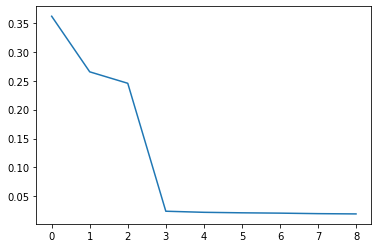

In [33]:
# delete this entire line and replace it with your code
model = PCA()
scaler = StandardScaler()
stock_preprocessed = scaler.fit_transform(stock_df)
stock_pca = model.fit(stock_preprocessed)

print(sum(stock_pca.explained_variance_ratio_[:5]))
plt.plot(stock_pca.explained_variance_ratio_)
plt.show()

n_important_components = 3

final_components = stock_pca.components_[:3]
final_components = varimax_rotation(final_components)

In [33]:
import numpy as np
check_variable_definition("n_important_components")
assert n_important_components == 3, "You have set <code>n_important_components</code> to the wrong value - take another look at <code>stock_pca.explained_variance_ratio_</code> and count the number of values before the magnitude decreases significantly. "
check_variable_definition("final_components")
assert isinstance(final_components, np.ndarray), "Did you compute <code>final_components</code> using <code>varimax_rotation</code>?"
assert final_components.shape == (3,9), "Your <code>final_components</code> array has the wrong shape - should be <code>(3,9)</code> - double check your code."                  
assert (np.abs(final_components) > 0.5).sum() == 9, "There should be nine values in your <code>final_components</code> array with magnitude greater than <code>0.5</code> - double check your code."
success()

In [34]:
final_components

array([[-0.00983654, -0.57680698, -0.57535211,  0.00754786, -0.01092336,
         0.00338572,  0.00503325, -0.57959373,  0.00499211],
       [ 0.00835458,  0.01090676, -0.00661725, -0.57814939, -0.57653415,
        -0.57691112,  0.00665631, -0.00453288, -0.01509359],
       [-0.57713074, -0.00784314, -0.00141155,  0.00505903,  0.00062468,
        -0.0057596 , -0.57600638,  0.00903505, -0.5787335 ]])

In [36]:
pd.DataFrame(final_components, columns=stock_df.columns)

,Bank of America,Google,Amazon,United,American,Delta,Wells Fargo,Facebook,Citigroup
0,-0.01,-0.58,-0.58,0.01,-0.01,0.00,0.01,-0.58,0.00
1,0.01,0.01,-0.01,-0.58,-0.58,-0.58,0.01,-0.00,-0.02
2,-0.58,-0.01,-0.00,0.01,0.00,-0.01,-0.58,0.01,-0.58


In [38]:
# similar sectors are correlated in price movements